In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
print('GPU information : ', tf.test.gpu_device_name(), '\n')
!nvidia-smi

GPU information :   

Tue Oct 26 00:30:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 456.71       Driver Version: 456.71       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2060   WDDM  | 00000000:01:00.0  On |                  N/A |
| 35%   29C    P2    32W / 160W |    562MiB /  6144MiB |      3%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                      

# Data_Load

# Data Preprocessing

In [12]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [23]:
dataset = './C:/Users/pc/ML/210806/train'
base_dir = './C:/Users/pc/ML/210806'
os.mkdir(basedir)
#valid_dir = os.path.join(base_dir,'validation')
#test_dir = os.path.join(base_dir,'test')

**ImageDataGenerator() & flow_from_directory()**

  - Normalization
    - ImageDataGenerator()

  - Resizing & Generator
    - flow_from_directory()

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1./255)
valid_gen = ImageDataGenerator(rescale = 1./255)

In [25]:
train_generator = train_gen.flow_from_directory(
                  train_dir,
                  target_size=(150,150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_gen.flow_from_directory(
                valid_dir,
                target_size=(150,150),
                batch_size = 20,
                class_mode='binary')

OSError: [WinError 123] 파일 이름, 디렉터리 이름 또는 볼륨 레이블 구문이 잘못되었습니다: './C:/Users/pc/ML/210806\\train'

In [15]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [16]:
labels_batch

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1.], dtype=float32)

## CNN Keras Modeling

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

#CNN
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(256,(3,3),activation= 'relu'))
model.add(layers.MaxPooling2D(2,2))

#DNN

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.4))
model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [25]:
dc_hist = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 60,
                    validation_data = vlid_generator,
                    validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 41s 86ms/step - loss: 0.7415 - accuracy: 0.5485 - val_loss: 0.6970 - val_accuracy: 0.5820
Epoch 2/60
100/100 [==============================] - 9s 91ms/step - loss: 0.6519 - accuracy: 0.6140 - val_loss: 0.6788 - val_accuracy: 0.5690
Epoch 3/60
100/100 [==============================] - 9s 93ms/step - loss: 0.6263 - accuracy: 0.6570 - val_loss: 0.6762 - val_accuracy: 0.6330
Epoch 4/60
100/100 [==============================] - 9s 92ms/step - loss: 0.5686 - accuracy: 0.7055 - val_loss: 0.8647 - val_accuracy: 0.5030
Epoch 5/60
100/100 [==============================] - 9s 86ms/step - loss: 0.5478 - accuracy: 0.7305 - val_loss: 0.6437 - val_accuracy: 0.6580
Epoch 6/60
100/100 [==============================] - 9s 85ms/step - loss: 0.5108 - accuracy: 0.7430 - val_loss: 0.7893 - val_accuracy: 0.6200
Epoch 7/60
100/100 [==============================] - 8s 85ms/step - loss: 0.4696 - accuracy: 0.7825 - val_loss: 0.7223 - val_accuracy: 0.631

- Loss Visualization

<function matplotlib.pyplot.show>

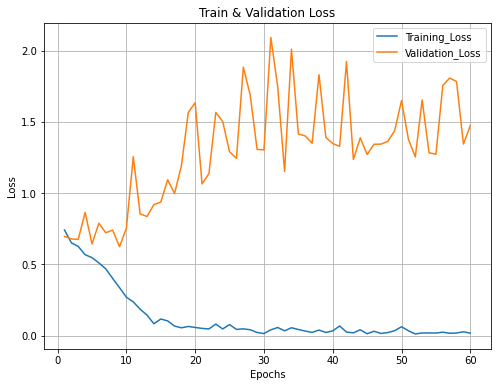

In [26]:

import matplotlib.pyplot as plt

epochs = range(1,len(dc_hist.history['loss'])+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, dc_hist.history['loss'])
plt.plot(epochs, dc_hist.history['val_loss'])

plt.title('Train & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training_Loss', 'Validation_Loss'])
plt.grid()
plt.show

- Accuracy Visualization

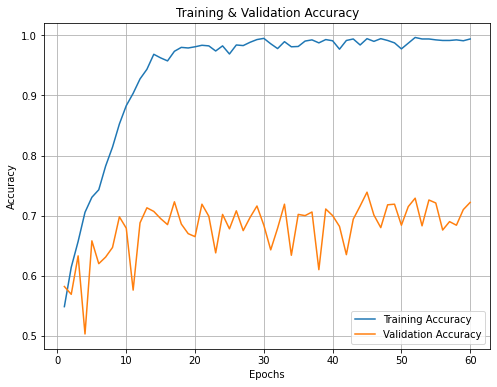

In [32]:
epochs = range(1,len(dc_hist.history['loss'])+1)
plt.figure(figsize=(8,6))

plt.plot(epochs, dc_hist.history['accuracy'])
plt.plot(epochs, dc_hist.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()


In [30]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [31]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 52ms/step - loss: 1.5391 - accuracy: 0.7270
Loss = 1.53911
Accuracy = 0.72700


- save

In [34]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 81512
-rw------- 1 root root    34600 Aug  4 09:09 001_Model_iris.h5
-rw------- 1 root root 83433016 Aug  6 07:08 002_dogs_and_cats_small.h5


- load

In [36]:
from tensorflow.keras.models import load_model
model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')
loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 50)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 57ms/step - loss: 1.5391 - accuracy: 0.7270
Loss = 1.53911
Accuracy = 0.72700
